### Modeling the early events in signaling by the epidermal growth factor receptor (EGFR), [Blinov 2006](https://www.sciencedirect.com/science/article/abs/pii/S0303264705001231/)


In [1]:
# Package import
from molclustpy import * 

### This model has multi-molecular complex as initial conditions

In [2]:
# bngl file (BioNetGen model) 
bng_file = 'EGFR_model.bngl'

# run multiple trials
simObj = BNG_multiTrials(bng_file, t_end=20, steps=20, numRuns=20)
print(simObj)
simObj.runTrials(delSim=False)
print()


***** // ***** 
Class : BNG_multiTrials
File Path : EGFR_model.bngl

t_end : 20 seconds 	 output_steps : 20
Number of runs: 20

Molecules: ['Grb2', 'Shc', 'Sos', 'egf', 'egfr']
Number of binding sites: [2, 2, 1, 1, 4]
Species Counts: [120.0, 10.0, 27.0, 13.0, 180.0, 49.0]

*** WARNING ***
Number of species is different than number of molecular types!
In case you have multi-molecular species as your initial condition, please provide total counts of each molecular types for subsequent analysis!

NFsim progress : [****************************************] 100%
Execution time : 27.2490 seconds



In [3]:
# analyze data across multiple trials
outpath = simObj.getOutPath()
molecules, numSite, counts, _ = simObj.getMolecules()
nfsObj = NFSim_output_analyzer(outpath)
nfsObj.process_gdatfiles()
#nfsObj.process_speciesfiles(molecules, counts=counts, valency=numSite) # will give an error
nfsObj.process_speciesfiles(molecules, counts=[59,27,62,120,180], valency=numSite)

Processing gdat_files : [****************************************] 100%

Observables:  {0: 'time', 1: 'Dimers', 2: 'Sos_act', 3: 'RP', 4: 'Shc_Grb', 5: 'Shc_Grb_Sos', 6: 'R_Grb2', 7: 'R_Shc', 8: 'R_ShcP', 9: 'ShcP', 10: 'R_G_S', 11: 'R_S_G_S', 12: 'Efgr_total', 13: 'Shc_total', 14: 'Sos_total', 15: 'Grb2_total'}

Processing species_files : [****************************************] 100%


### Visualization

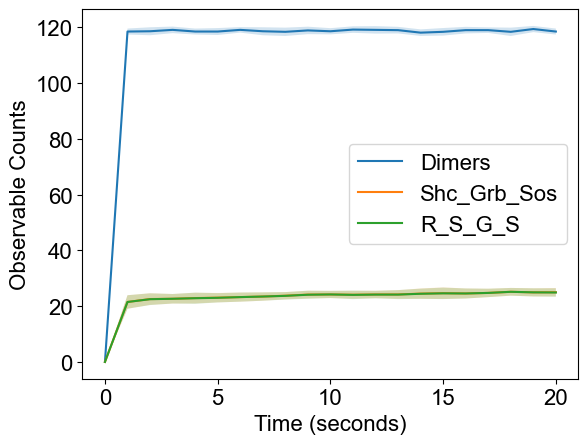

In [4]:
plotTimeCourse(outpath, obsList=[1,5,11])

### 2. Plot system level quantities

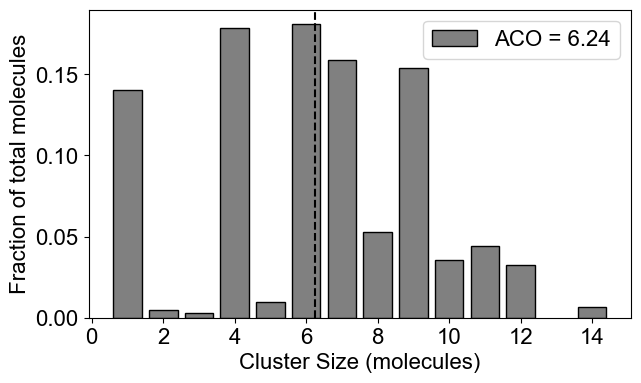

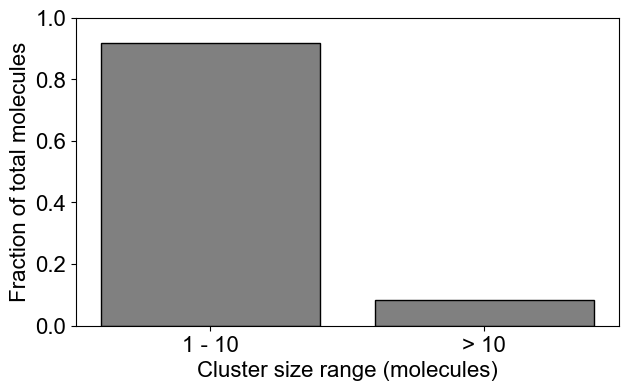

In [5]:
# 2A: Cluster size distribution (ACO: Average Cluster Occupancy)
plotClusterDist(outpath)
# You can plot a binned distribution by providing cluster size ranges
plotClusterDist(outpath, sizeRange=[1,10])

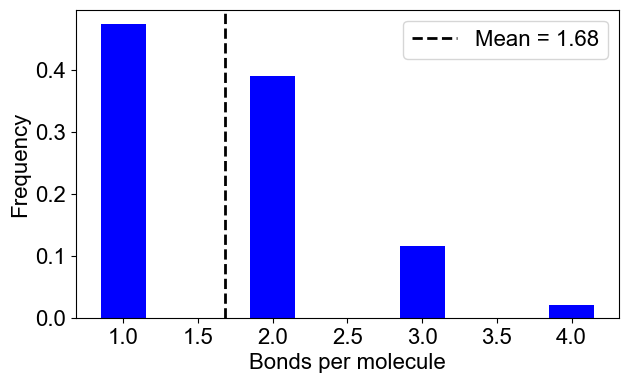

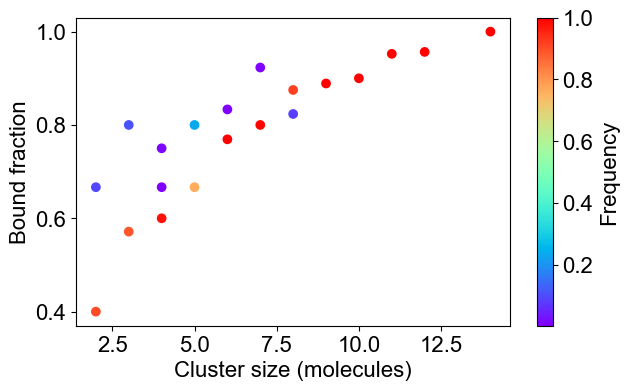

In [6]:
# 2B: Number of bonds per molecule
plotBondsPerMolecule(outpath)
# 2C: Bound fraction distribution
plotBoundFraction(outpath)

### 3. Plot molecule specific quantities

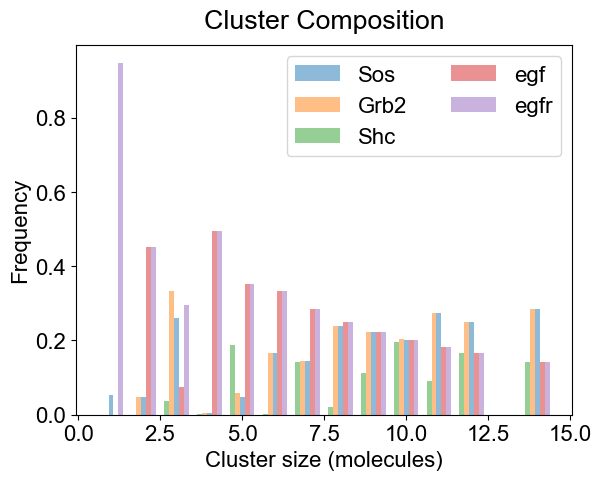

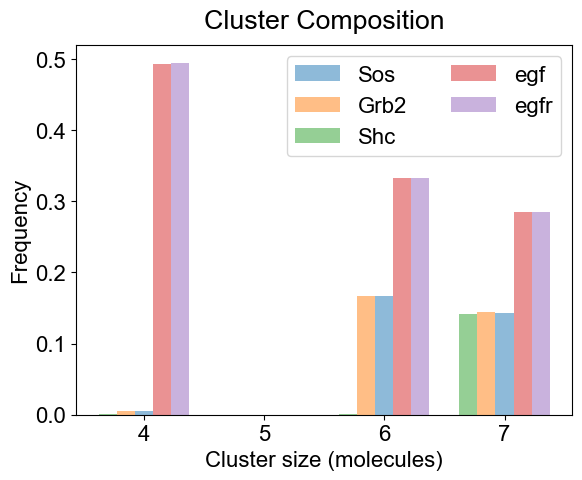

In [7]:
# 3A. Average composition of indivual clusters. 
# Default is all the clusters present in the system. As before, adjust width and transparency (alpha) for visual clarity.
plotClusterComposition(outpath, specialClusters=[], width=0.15, alpha=0.5)

# You can look at the composition of a set of clusters (specialClusters) also
plotClusterComposition(outpath, specialClusters=[4, 6, 7], width=0.15, alpha=0.5)

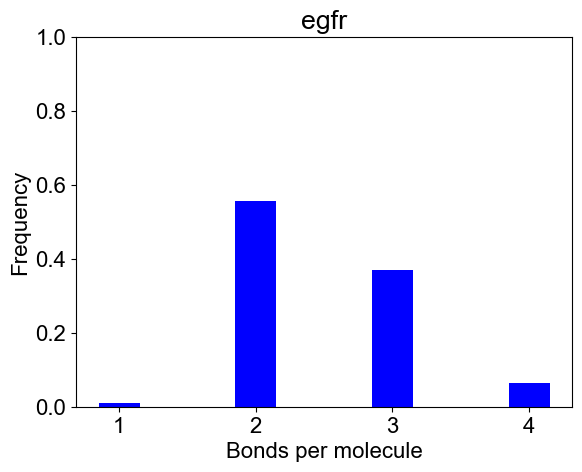

In [8]:
# 3B. Bondcount distribution of each molecular type 
# You may provide a subset of molecules also
plotBondCounts(outpath, molecules=['egfr'])